# Titanic Project

## Content 

### 1) Importing Library and Loading the Data

### 2) Data Exploration

### 3) Feature Engineering 

### 4) Data Preprocessing

### 5) Basic Feature and Model Selection 

### 6) Hyperparameter Tuning 

### 7) Results 

## Importing Library and Loading the Data

In [2]:
import numpy as np 
import pandas as pd 
import plotly.express as px

In [3]:
import plotly.io as pio

# Create a custom theme and set it as default
pio.templates["custom"] = pio.templates["plotly_white"]
pio.templates["custom"].layout.margin = {'b': 25, 'l': 25, 'r': 25, 't': 50}
pio.templates["custom"].layout.width = 450
pio.templates["custom"].layout.height = 300
pio.templates["custom"].layout.autosize = False
pio.templates["custom"].layout.font.family="Arial"
pio.templates["custom"].layout.title.update({"x":0.5, "xref":"paper", "font_family":"Arial Black"})
pio.templates["custom"].layout.xaxis.update({"showline":True, "linecolor":"darkgray"})
pio.templates["custom"].layout.yaxis.update({"showline":True, "linecolor":"darkgray"})
pio.templates["custom"].layout.colorway = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD',
                                           '#8C564B', '#E377C2', '#7F7F7F', '#BCBD22', '#17BECF']
pio.templates.default = "custom"

In [4]:
# import warnings
# warnings.filterwarnings(action=’ignore’)

In [5]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Exploration
### 1) For Numerical Columns 
* Visualize distributions with histogram 
* Visualize correlation between columns with heatmap
* Compare the average of each variable between survived and non-survived 


### 2) For Categorical Columns
* Visualize survival frequency with bar chart 
* Visualize the relationship between each variable and survival with stacked bar chart

In [9]:
# information about data types & null values 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Cabin have significant amount of null values, while Embarked has 2 null values.

In [8]:
# some statistics for columns with numerical Dtype
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# separate numerical and categorical columns
train_df_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
train_df_cat = train_df[['Name','Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

In [11]:
# distributions for numerical columns 
for i in train_df_num.columns:
    fig = px.histogram(train_df_num[i], title=i)
    fig.update_layout(showlegend=False)
    fig.show()

None of the numerical columns are normally distributed.

In [12]:
# correlation between numerical columns
corr_df = train_df_num.corr()

# mask the upper triangle of the correlation matrix with NaN
mask = np.triu(np.ones_like(corr_df, dtype=bool))
corr_df = corr_df.mask(mask)

fig = px.imshow(corr_df, color_continuous_scale='rdbu',
                x=corr_df.index, y=corr_df.columns, 
                labels={"color":"R"}, title="Correlation Heatmap")
fig.update_layout(xaxis_showgrid=False, yaxis_showgrid=False)
fig

There's a moderate correlation between SibSp vs Parch, and weak correlations between SibSp vs Age and Parch vs Fare.

In [13]:
# compare the average Age, SibSp, Parch, and Fare between the survived and non-survived
train_df.groupby('Survived').agg(["mean","median"])[train_df_num.columns]

Age            SibSp            Parch              Fare       
               mean median      mean median      mean median       mean median
Survived                                                                      
0         30.626179   28.0  0.553734      0  0.329690      0  22.117887   10.5
1         28.343690   28.0  0.473684      0  0.464912      0  48.395408   26.0

The survived has lower mean for Age and SibSp and higher mean for Parch and Fare.

In [14]:
# check cardinality for categorical columns
train_df_cat.nunique()

Name        891
Survived      2
Pclass        3
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [15]:
# survival frequency
viz_df = train_df_cat['Survived'].value_counts()
fig = px.bar(viz_df, title='Survival Frequency', labels={"value":"count", "index":"Survived"})
fig.update_layout(showlegend=False)
fig.update_xaxes(tickvals=[0,1])
fig.show()

Only 38% of the passengers survived.

In [16]:
# survival frequency based on each categorical column
for i in ['Pclass', 'Sex', 'Embarked']:
    pivot_df = pd.pivot_table(train_df_cat, index = i, columns = "Survived", values = 'Name' ,aggfunc ='count')
    fig = px.bar(pivot_df, title="Survival Freq Based on {}".format(i), labels={"value":"count"})
    fig.update_layout(legend_traceorder="reversed")
    fig.show()

In [17]:
# survival rate based on each categorical column
for i in ['Pclass', 'Sex', 'Embarked']:
    pivot_df = pd.pivot_table(train_df_cat, index = i, columns = "Survived", values = 'Name' ,aggfunc ='count')
    pivot_df = pivot_df.apply(lambda x: round(x / pivot_df.sum(axis=1), 2))
    fig = px.bar(pivot_df, title="Survival Rate Based on {}".format(i), labels={"value":"ratio"})
    fig.update_layout(legend_traceorder="reversed")
    fig.show()

Pclass: Survival rate of 1 > 2 > 3  
Sex: Survival rate of female > male  
Embarked: Survival rate of C > Q > S

## Feature Engineering  
1) Reduce the cardinality of cabin and tickets.  
2) Extract title from the passenger name.

In [18]:
train_df_cat['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Some values include multiple cabins (e.g. 'B57 B59 B63 B66')

In [19]:
# find Cabin that contain multiple cabins
for i in train_df_cat['Cabin'].unique():
    if type(i) != str:
        continue
    elif " " in i:
        count_i = train_df_cat[train_df_cat['Cabin'] == i].shape[0]
        print(i, "count:", count_i)

C23 C25 C27 count: 4
F G73 count: 2
D10 D12 count: 1
B58 B60 count: 2
F E69 count: 1
C22 C26 count: 3
B57 B59 B63 B66 count: 2
B96 B98 count: 4
B51 B53 B55 count: 2
F G63 count: 1
C62 C64 count: 1
B82 B84 count: 1


The multiple cabins have the same initial except for F G73, F E69, and F G63.

In [20]:
# creates categories based on the cabin initial
train_df_cat['cabin_initial'] = train_df_cat['Cabin'].str[0]
train_df_cat['cabin_initial'] = train_df_cat['cabin_initial'].fillna('na')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# frequency of each cabin initial
viz_df = train_df_cat['cabin_initial'].value_counts()
fig = px.bar(viz_df, labels={"index":"cabin_initial", "value":"count"}, title="Cabin Inital Frequency")
fig.update_layout(showlegend=False)

In [22]:
# compare the surivial rate by cabin_initial
pivot_df = pd.pivot_table(train_df_cat, index='cabin_initial', columns='Survived', values='Name', aggfunc='count')
pivot_df = pivot_df.apply(lambda x: round(x/pivot_df.sum(axis=1), 2))
px.bar(pivot_df, title="Survival Rate by Cabin Initial", labels={"value":"ratio"})

It seems there is a relationship between the cabin_inital and the survival rate, so we will add it to the train_df

In [23]:
train_df['cabin_initial'] = train_df['Cabin'].str[0]
train_df['cabin_initial'] = train_df['cabin_initial'].fillna('na')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,na
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,na
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,na


In [24]:
# understand ticket values better 
train_df_cat['numeric_ticket'] = train_df_cat['Ticket'].str[0].str.isdigit()
train_df_cat['ticket_letters'] = train_df_cat.loc[train_df_cat['Ticket'].str[0].str.isalpha(), 'Ticket'].str.split().str[0]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
train_df_cat['numeric_ticket'].value_counts()

True     661
False    230
Name: numeric_ticket, dtype: int64

In [26]:
train_df_cat['ticket_letters'].value_counts()

PC            60
C.A.          27
STON/O        12
A/5           10
W./C.          9
SOTON/O.Q.     8
CA.            8
SOTON/OQ       7
A/5.           7
STON/O2.       6
CA             6
S.O.C.         5
F.C.C.         5
C              5
SC/PARIS       5
LINE           4
SC/Paris       4
PP             3
A/4            3
SC/AH          3
S.O./P.P.      3
A/4.           3
S.C./PARIS     2
P/PP           2
A./5.          2
SOTON/O2       2
WE/P           2
A.5.           2
A/S            1
A4.            1
W.E.P.         1
S.W./PP        1
C.A./SOTON     1
SW/PP          1
F.C.           1
SC             1
S.O.P.         1
W/C            1
SCO/W          1
S.P.           1
S.C./A.4.      1
Fa             1
SO/C           1
Name: ticket_letters, dtype: int64

The cardinality for ticket_letters is still high, so we will discard it.

In [27]:
# check the survival rate between numeric vs non-numeric tickets
pivot_df = pd.pivot_table(train_df_cat,index='numeric_ticket',columns='Survived', values = 'Name', aggfunc='count')
pivot_df = pivot_df.apply(lambda x: round(x/pivot_df.sum(axis=1), 2))
px.bar(pivot_df, title="Survival Rate by Ticket Type", labels={"value":"ratio"})

Both numeric and non-numeric tickets have the same survival rate, so we will discard it as well.

In [28]:
train_df_cat['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [29]:
# extract title from passenger name
train_df_cat['name_title'] = train_df_cat['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
train_df_cat['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Jonkheer          1
Sir               1
the Countess      1
Don               1
Capt              1
Lady              1
Ms                1
Mme               1
Name: name_title, dtype: int64

In [31]:
# further reduce the cardinality
title_dict = {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer",
              "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir":"Royalty",
              "Lady":"Royalty", "the Countess":"Royalty", "Mr":"Mr", "Mme":"Mrs", 
              "Ms":"Mrs", "Mrs":"Mrs", "Mlle":"Miss", "Miss":"Miss", "Master":"Master"}
train_df_cat['name_title'] = train_df_cat['name_title'].replace(title_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# frequency of the reduced name title
viz_df = train_df_cat['name_title'].value_counts()
fig = px.bar(viz_df, labels={"index":"name_title", "value":"count"}, title="Name Title Frequency")
fig.update_layout(showlegend=False)

In [33]:
# check the survival rate based on the name titles
pivot_df = pd.pivot_table(train_df_cat, index='name_title', columns='Survived', values='Name', aggfunc='count')
pivot_df = pivot_df.apply(lambda x: round(x/pivot_df.sum(axis=1), 2))
px.bar(pivot_df, title="Survival Rate by Name Title", labels={"value":"ratio"})

name_title seems to affect survival rate, so we will include it in train_df.

In [34]:
train_df['name_title'] = train_df_cat['name_title']

In [ ]:
# extract the surname in the future

## Data Preprocessing for Model 
### 1) Drop the row if Embarked is missing (only 2 rows).

### 2) Impute data with median for age.

### 3) Scale numerical data with standard scaler.

### 4) Encode categorical data with one-hot encoder.


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config

In [36]:
# drop the row if Embarked is missing
X = train_df.dropna(subset=['Embarked'])
y = X.pop('Survived')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_features = ['Pclass', 'Sex', 'Embarked', 'cabin_initial', 'name_title']
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [38]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

## Basic Feature and Model Selection
Select 15 features based on the mutual information, and test different models using default parameters with repeated k-folds CV. Then choose the models with the best score further hyperparameter tuning.

In [39]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import RepeatedKFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Mutual information measures the reduction in uncertainty for variable Y given a known variable X

In [40]:
def mi_score(X, y):
    return mutual_info_classif(X, y, random_state=42)
selector = SelectKBest(mi_score, k=15)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [41]:
print(X_train_scaled.shape)
print(X_train_selected.shape)

(711, 27)
(711, 15)


In [42]:
xgb = XGBClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
gnb = GaussianNB()
dtc = DecisionTreeClassifier(random_state=42)
svc = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()


models_df = pd.DataFrame()
models_df['Model'] = ['XGBoost', 'Random Forest', 'Decision Tree', 'GaussianNB', 'Support Vector', 'Logistic Regression', 'KNeighbors']
models_df.index = [xgb, rfc, dtc, gnb, svc, lr, knn]

kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

for model in models_df.index:
    cv = cross_val_score(model, X_train_selected, y_train, cv=kf)
    models_df.loc[model, 'mean_score'] = cv.mean()
    models_df.loc[model, 'std_score'] = cv.std()

In [43]:
fig = px.bar(models_df, y='Model', x='mean_score', error_x='std_score', title='CV Mean Score')
fig.update_layout(yaxis={'categoryorder':'total ascending'})

The top 5 performing model will be chosen for further hyperparameter tuning.

## Hyperparamater tuning

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

In [45]:
cv = KFold(5, shuffle=True, random_state=42)

In [46]:
svc = SVC(probability=True, random_state=42)
param_grid = {'kernel': ['rbf'] , 
              'C':[0.1, 1, 10, 100, 1000],
              'gamma': [10, 1, 0.1, 0.01, 0.001]}
grid_svc = GridSearchCV(svc, param_grid = param_grid, cv = cv, verbose = True, n_jobs = -1)
grid_svc.fit(X_train_selected,y_train)
grid_svc.score(X_train_selected, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   11.5s finished


0.8860759493670886

In [47]:
print(grid_svc.best_params_)
print(grid_svc.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1, probability=True, random_state=42)


In [48]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,9,15],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
grid_knn = GridSearchCV(knn, param_grid = param_grid, cv = cv, verbose = True, n_jobs = -1)
grid_knn.fit(X_train_selected,y_train)
grid_knn.score(X_train_selected, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.5s finished


0.869198312236287

In [49]:
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

{'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(p=1)


In [51]:
lr = LogisticRegression(random_state=42)
param_grid = {'max_iter' : [1000],
              'penalty' : ['none','l1', 'l2'],
              'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'solver' : ['liblinear']}

grid_lr = GridSearchCV(lr, param_grid = param_grid, cv = cv, verbose = True, n_jobs = -1)
grid_lr.fit(X_train_selected,y_train)
grid_lr.score(X_train_selected, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 out of 105 | elapsed:    1.0s finished


0.8368495077355836

In [52]:
print(grid_lr.best_params_)
print(grid_lr.best_estimator_)

{'C': 1000, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=1000, max_iter=1000, penalty='l1', random_state=42,
                   solver='liblinear')


In [53]:
xgb = XGBClassifier(random_state = 42)

param_grid = {
    'n_estimators': [100,200,400],
    'colsample_bytree': [0.25, 0.5, 0.75],
    'max_depth': [3,6,9,12],
    'learning_rate':[0.05, 0.1, 0.2],
    'gamma':[0.1, 0.2, 0.5, 1],
}

grid_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = cv, verbose = True, n_jobs = -1)
grid_xgb.fit(X_train_selected,y_train)
grid_xgb.score(X_train_selected, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 370 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 870 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done 1570 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  2.8min finished


0.8846694796061885

In [54]:
print(grid_xgb.best_params_)
print(grid_xgb.best_estimator_)

{'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [55]:
rf = RandomForestClassifier(random_state = 42)
param_grid =  {'n_estimators': [100,200,500],
              'criterion':['gini','entropy'],
              'bootstrap': [True],
              'max_depth': [None],
              'max_features': ['log2','sqrt', 10],
              'min_samples_leaf': [2,3],
              'min_samples_split': [2,3]}
                                  
grid_rf = GridSearchCV(rf, param_grid = param_grid, cv = cv, verbose = True, n_jobs = -1)
grid_rf.fit(X_train_selected,y_train)
grid_rf.score(X_train_selected, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.4min finished


0.890295358649789

In [56]:
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
RandomForestClassifier(max_features='log2', min_samples_leaf=2,
                       n_estimators=200, random_state=42)


Random Forest has the highest accuracy after tuning, so let's check the feature importance and evaluate it on the test set to see how well it generalize.

In [66]:
from sklearn.metrics import classification_report, plot_confusion_matrix

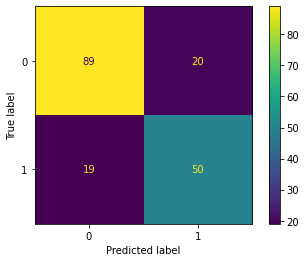

In [70]:
plot_confusion_matrix(grid_rf, X_test_selected, y_test)

In [64]:
y_pred = grid_rf.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       109
           1       0.71      0.72      0.72        69

    accuracy                           0.78       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



Out of 178 predictions (89+20+19+50), RF models predicted 139 (89+50) of them correctly, which results in an accuracy 0.78.  
Out of 69 (10+50) survived (ground truth), RF model predicted 50 of them correctly, which results in a recall of 0.72 for the survived class.  
Out of 70 (20+50) prediction of survived, 50 of them are correct, which results in a precision of 0.71 for the survived class.  
F1-score = 2PR / (P+R) = 2 * 0.714 * 0.724 / (0.714+0.724) = 0.72 

Let's continue and retrain the RF with the whole training data and use it for prediction.

In [102]:
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', selector),
    ('classifier', RandomForestClassifier(random_state = 42))])

# Display Pipeline
set_config(display='diagram')
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex', 'Embarked',
                                                   'cabin_initial',
                                                   'name_title'])])),
                ('feature_selector',
                 SelectKBest(k=15,
                             score_func=<function mi_score at 0x7f76822e8950>)),
                ('classifier', RandomForestClassifier(random_state=42))])

In [104]:
rf = RandomForestClassifier(random_state = 42)
param_grid =  {'classifier__n_estimators': [100,200,500],
              'classifier__criterion':['gini','entropy'],
              'classifier__bootstrap': [True],
              'classifier__max_depth': [None],
              'classifier__max_features': ['log2','sqrt', 10],
              'classifier__min_samples_leaf': [2,3],
              'classifier__min_samples_split': [2,3]}
                                  
grid_pipe = GridSearchCV(pipe, param_grid = param_grid, cv = cv, verbose = True, n_jobs = -1).fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  3.7min finished


In [105]:
# apply the same feature engineering as train_df
test_df['cabin_initial'] = test_df['Cabin'].str[0]
test_df['cabin_initial'] = test_df['cabin_initial'].fillna('na')
test_df['name_title'] = test_df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
test_df['name_title'] = test_df['name_title'].replace(title_dict)

In [106]:
y_pred = grid_pipe.predict(test_df)
submission = pd.DataFrame()
submission['PassengerId'] = test_df['PassengerId']
submission['Survived'] = y_pred

In [107]:
#prepare submission files 
submission.to_csv('submission.csv', index =False)

## References:
1) https://www.kaggle.com/code/kenjee/titanic-project-example  
2) https://www.kaggle.com/code/anandhuh/titanic-simple-solution-top-12